# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [117]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [25]:
df = pd.read_csv("multipleChoiceResponses_cleaned.csv", encoding = 'latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
list(df.columns)

['GenderSelect',
 'Country',
 'Age',
 'EmploymentStatus',
 'StudentStatus',
 'LearningDataScience',
 'CodeWriter',
 'CareerSwitcher',
 'CurrentJobTitleSelect',
 'TitleFit',
 'CurrentEmployerType',
 'MLToolNextYearSelect',
 'MLMethodNextYearSelect',
 'LanguageRecommendationSelect',
 'PublicDatasetsSelect',
 'LearningPlatformSelect',
 'LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'Lear

In [4]:
#Your code here

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [30]:
df['FormalEducation'].value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [32]:
df['AdjustedCompensation'].value_counts()

100000.000000    60
120000.000000    59
150000.000000    58
71749.560000     47
50000.000000     45
                 ..
70786.560000      1
6880.782804       1
36344.944000      1
106563.600000     1
48126.250000      1
Name: AdjustedCompensation, Length: 1627, dtype: int64

In [38]:
df['AdjustedCompensation'].max()

28297400000.0

In [37]:
df[df['AdjustedCompensation'] == df['AdjustedCompensation'].max()]

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
5477,A different identity,United Kingdom,100.0,Employed full-time,NaN,NaN,Yes,NaN,Statistician,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282974,2.829740e+10


In [59]:
df_bach = df[df['FormalEducation'] == "Bachelor's degree"]['AdjustedCompensation'].copy()
df_bach.dropna(inplace = True)

In [61]:
df_mast = df[df['FormalEducation'] == "Master's degree"]['AdjustedCompensation'].copy()
df_mast.dropna(inplace = True)

Median Salary for Bachelor's degree 38399.4
Median Salary for Masters degree 53812.17000000001
Sample Size for Bachelor's degree 1107
Sample Size for Masters degree 1990


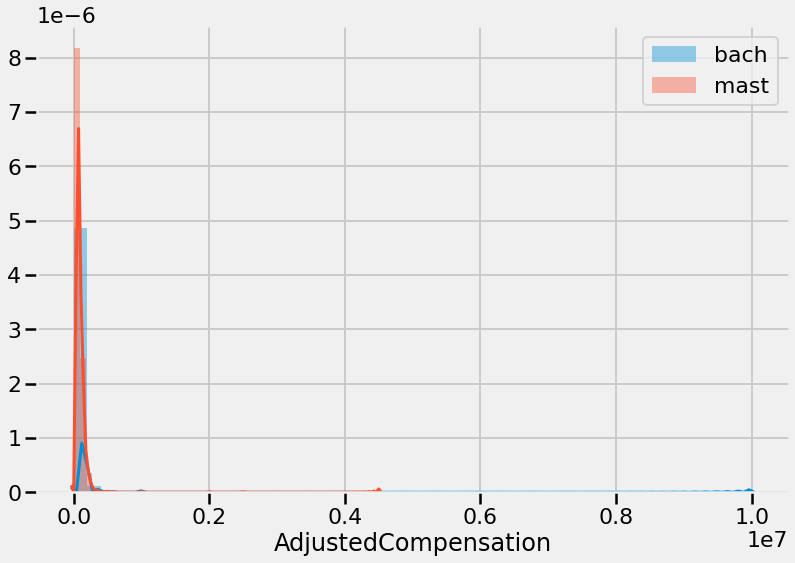

In [76]:
print(f"Median Salary for Bachelor's degree {df_bach.median()}")
print(f"Median Salary for Masters degree {df_mast.median()}")


print(f"Sample Size for Bachelor's degree {len(df_bach)}")
print(f"Sample Size for Masters degree {len(df_mast)}")

with plt.style.context('fivethirtyeight'):
    sns.set_context('poster')
    plt.figure(figsize = (12, 8))
    sns.distplot(df_bach, label = 'bach')
    sns.distplot(df_mast, label = 'mast')
    plt.legend()

In [70]:
# df['AdjustedCompensation'].isnull().sum()

In [ ]:
# Null Hypothesis: Salary for Bach = Salary for Mast
# Alternative Hypothesis: Salary for Bach != Salary for Mast

In [79]:
# df_bach.var(), df_mast.var()

(94209629758.56929, 18367624245.044666)

In [78]:
ttest_ind(df_bach, df_mast, equal_var = False)[1] / 2
# fail to reject the null hypothesis

0.33077639451272445

In [80]:
df_bach_200 = df_bach[df_bach < 200000]
df_mast_200 = df_mast[df_mast < 200000]

Median Salary for Bachelor's degree 35874.78
Median Salary for Masters degree 50224.692
Sample Size for Bachelor's degree 1075
Sample Size for Masters degree 1929


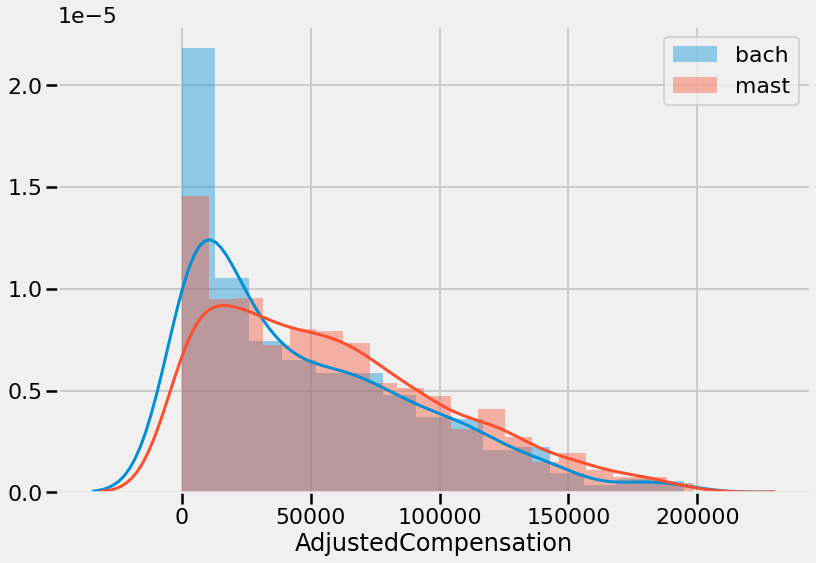

In [81]:
print(f"Median Salary for Bachelor's degree {df_bach_200.median()}")
print(f"Median Salary for Masters degree {df_mast_200.median()}")


print(f"Sample Size for Bachelor's degree {len(df_bach_200)}")
print(f"Sample Size for Masters degree {len(df_mast_200)}")

with plt.style.context('fivethirtyeight'):
    sns.set_context('poster')
    plt.figure(figsize = (12, 8))
    sns.distplot(df_bach_200, label = 'bach')
    sns.distplot(df_mast_200, label = 'mast')
    plt.legend()

In [83]:
ttest_ind(df_bach_200, df_mast_200, equal_var = False)
# Statistically significant

Ttest_indResult(statistic=-5.940176705418014, pvalue=3.286681514092391e-09)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [84]:
df_bach = df[df['FormalEducation'] == "Bachelor's degree"]["AdjustedCompensation"].copy()
df_bach.dropna(inplace = True)
df_doct = df[df['FormalEducation'] == "Doctoral degree"]["AdjustedCompensation"].copy()
df_doct.dropna(inplace = True)

In [89]:
df_doct.describe()

count    9.670000e+02
mean     2.956618e+07
std      9.099981e+08
min     -7.351631e+01
25%      4.000000e+04
50%      7.413192e+04
75%      1.200000e+05
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64

In [90]:
df_bach.describe()

count    1.107000e+03
mean     6.488710e+04
std      3.069359e+05
min      0.000000e+00
25%      1.126620e+04
50%      3.839940e+04
75%      8.023100e+04
max      9.999999e+06
Name: AdjustedCompensation, dtype: float64

Median Salary for Bachelor's degree 38399.4
Median Salary for Doctoral degree 74131.91999999997
Sample Size for Bachelor's degree 1107
Sample Size for Doctoral degree 967


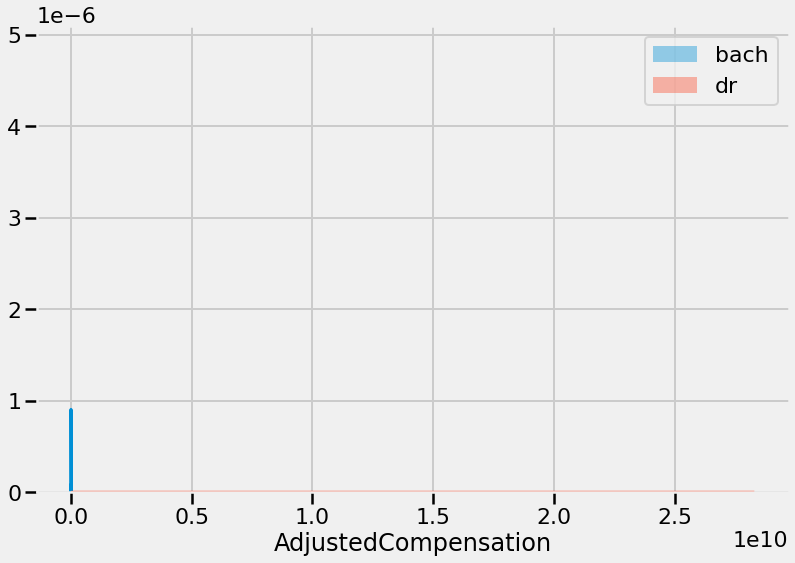

In [88]:
print(f"Median Salary for Bachelor's degree {df_bach.median()}")
print(f"Median Salary for Doctoral degree {df_doct.median()}")


print(f"Sample Size for Bachelor's degree {len(df_bach)}")
print(f"Sample Size for Doctoral degree {len(df_doct)}")

with plt.style.context('fivethirtyeight'):
    sns.set_context('poster')
    plt.figure(figsize = (12, 8))
    sns.distplot(df_bach, label = 'bach')
    sns.distplot(df_doct, label = 'dr')
    plt.legend()

In [87]:
ttest_ind(df_bach, df_doct, equal_var = False)[1]/2
# Not statistically significant - fail to reject the Null H.

0.15682381994720257

In [91]:
# Null Hypothesis: Salary for Bach = Salary for Doct
# Alternative Hypothesis: Salary for Bach != Salary for Doct

In [111]:
df_bach_200 = df_bach[(df_bach < 200000) & (df_bach > 0) ]
df_doct_200 = df_doct[(df_doct < 200000) & (df_doct > 0)]
ttest_ind(df_bach_200, df_doct_200, equal_var = False)

Ttest_indResult(statistic=-12.729717760067372, pvalue=1.2580514194611785e-35)

In [105]:
df_bach_200

8         64184.800
9         20882.400
11         1483.900
21        20000.000
25        10858.848
            ...    
26031     39050.000
26072     31878.000
26101      3336.000
26185     50000.000
26195    100449.384
Name: AdjustedCompensation, Length: 1067, dtype: float64

In [109]:
df_doct_200.describe()

count       902.000000
mean      76052.867260
std       49353.292850
min           2.797536
25%       36432.000000
50%       70000.000000
75%      107624.340000
max      198628.200000
Name: AdjustedCompensation, dtype: float64

In [103]:
7.41 * 10 ** 4

74100.0

Median Salary for Bachelor's degree 36720.0
Median Salary for Doctoral degree 70000.0
Sample Size for Bachelor's degree 1067
Sample Size for Doctoral degree 902


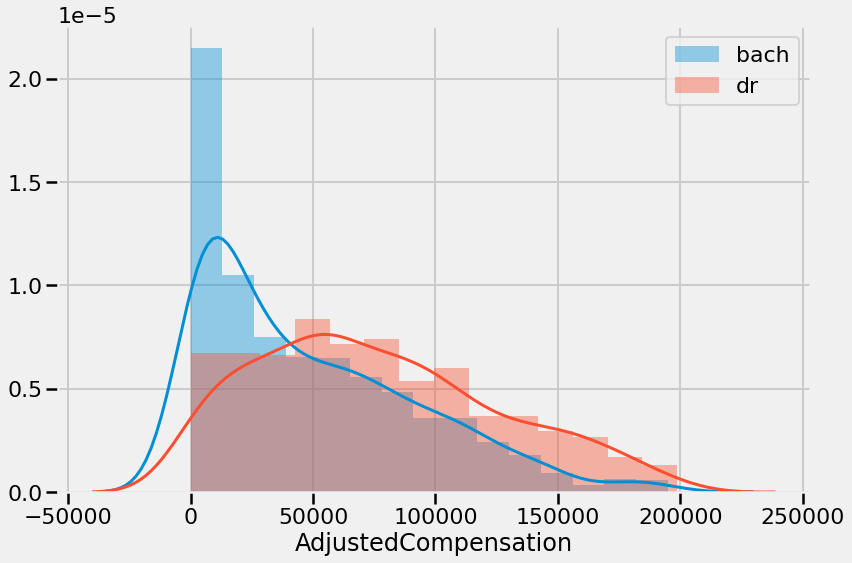

In [110]:
print(f"Median Salary for Bachelor's degree {df_bach_200.median()}")
print(f"Median Salary for Doctoral degree {df_doct_200.median()}")


print(f"Sample Size for Bachelor's degree {len(df_bach_200)}")
print(f"Sample Size for Doctoral degree {len(df_doct_200)}")

with plt.style.context('fivethirtyeight'):
    sns.set_context('poster')
    plt.figure(figsize = (12, 8))
    sns.distplot(df_bach_200, label = 'bach')
    sns.distplot(df_doct_200, label = 'dr')
    plt.legend()

In [112]:
ttest_ind(df_bach_200, df_doct_200, equal_var = False)
# Reject the Null Hypothesis

Ttest_indResult(statistic=-12.729717760067372, pvalue=1.2580514194611785e-35)

In [11]:
#Your code here

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [113]:
df['FormalEducation'].value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [ ]:
formula = 'AdjustedCompensation ~ C(FormalEducation)'

In [119]:
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, type = 2)
print(table)
# This shows that it is not statistically significant.

                        df        sum_sq       mean_sq         F    PR(>F)
C(FormalEducation)     6.0  6.540294e+17  1.090049e+17  0.590714  0.738044
Residual            4335.0  7.999414e+20  1.845309e+17       NaN       NaN


In [124]:
lm = ols(formula, df[df['AdjustedCompensation'] < 200000]).fit()
table = sm.stats.anova_lm(lm, type = 2)
print(table)
# Becomes statistically significant when the outliers are removed.

                        df        sum_sq       mean_sq          F  \
C(FormalEducation)     6.0  3.784221e+11  6.307034e+10  29.564778   
Residual            4171.0  8.897966e+12  2.133293e+09        NaN   

                          PR(>F)  
C(FormalEducation)  7.016635e-35  
Residual                     NaN  


In [ ]:
#Your code here

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!